In [ ]:
EXPERIMENT 01

In [4]:
# First, make sure you have installed the necessary libraries
# You can use pip install or conda install depending on your environment
# pip install numpy
# pip install scikit-learn
# pip install matplotlib
# pip install pandas

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # Added for plotting

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

new_model = LinearRegression()
new_model.fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")
print(f"slope: {new_model.coef_}")

y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

x_new = np.arange(5).reshape((-1, 1))
y_new = model.predict(x_new)


coefficient of determination: 0.7158756137479542
intercept: [5.63333333]
slope: [[0.54]]
predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


Estimated Coefficients:
b0 =  35000.0 
b1 =  1000.0


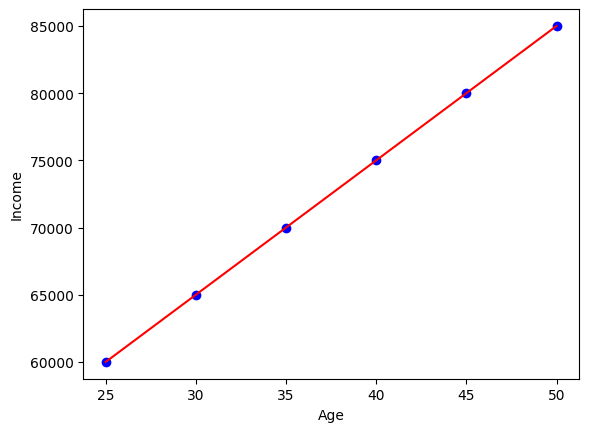

In [7]:
# First, make sure you have installed the necessary libraries
# You can use pip install or conda install depending on your environment
# pip install pandas
# pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Corrected import statement for matplotlib

dataFrame = pd.read_csv('Age_Income.csv')
age = dataFrame['Age']
income = dataFrame['Income']
num = np.size(age)
mean_age = np.mean(age)
mean_income = np.mean(income)
CD_ageincome = np.sum(income * age) - num * mean_income * mean_age
CD_ageage = np.sum(age * age) - num * mean_age * mean_age
b1 = CD_ageincome / CD_ageage
b0 = mean_income - b1 * mean_age
print("Estimated Coefficients:")
print("b0 = ", b0, "\nb1 = ", b1)

plt.scatter(age, income, color="b", marker="o")
response_Vec = b0 + b1 * age
plt.plot(age, response_Vec, color="r")
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


In [ ]:
EXPERIMENT 2

In [9]:
import numpy as np
from sklearn import linear_model

X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
logr = linear_model.LogisticRegression()
logr.fit(X, y)

# Predict if a tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(np.array([3.46]).reshape(-1, 1))
print(predicted)

# Define a function to convert logit to probability
def logit2prob(logr, X):
    log_odds = logr.coef_ * X + logr.intercept_
    odds = np.exp(log_odds)
    probability = odds / (1 + odds)
    return probability

print(logit2prob(logr, X))



[0]
[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


   Age  Income  Purchased
0   25   25000          0
1   30   27000          1
2   31   30000          0


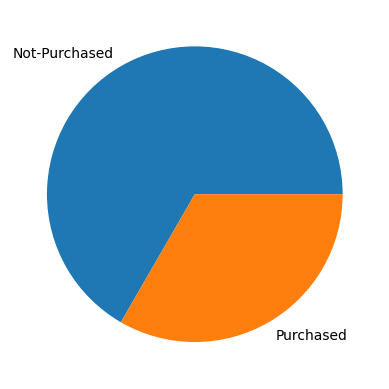

Not purchased: 2
Purchased: 1
Independent class:
 [[   30 27000]
 [   25 25000]]


In [2]:
# Make sure you have already installed the required libraries using pip.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Import the dataset
try:
    dataset = pd.read_csv('LogisticRegressiondata.csv')
except FileNotFoundError:
    print("Error: The file 'LogisticRegressiondata.csv' not found.")
    exit()

# Print the dataset
print(dataset)

# Split the data into inputs and outputs
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values

# Count the total output data from the 'Purchased' column
target_balance = dataset['Purchased'].value_counts().reset_index()

# Create variables for class counts
class_one = 0
class_two = 0

# Iterate through the output class to count occurrences
for i in y:
    if i == 0:
        class_one += 1
    else:
        class_two += 1

# Create numpy array for pie chart
values = np.array([class_one, class_two])
label = ["Not-Purchased", "Purchased"]

# Plot the pie chart
plt.pie(values, labels=label)
plt.show()

# Print the results
print("Not purchased:", class_one)
print("Purchased:", class_two)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Independent class:\n", X_train[:10])


In [ ]:
EXPERIMENT 3

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Define column names for your dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Load the dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

# Display the first few rows of the dataset
pima.head()

# Define the features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]  # Features
y = pima.label  # Target variable

# Split the dataset into training and testing sets (70% training and 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Train the Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Calculate and print the accuracy of the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8333333333333334


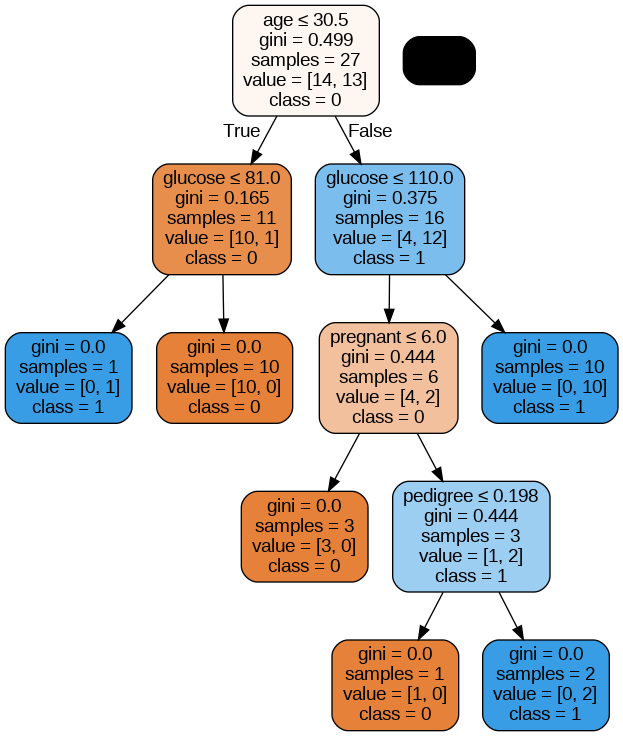

In [8]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
filled=True, rounded=True,
special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


In [ ]:
EXPERIMENT 4

Explained Variance Ratio
PC1: 0.9246187232017271
PC2: 0.05306648311706782
PC3: 0.017102609807929763
PC4: 0.005212183873275374


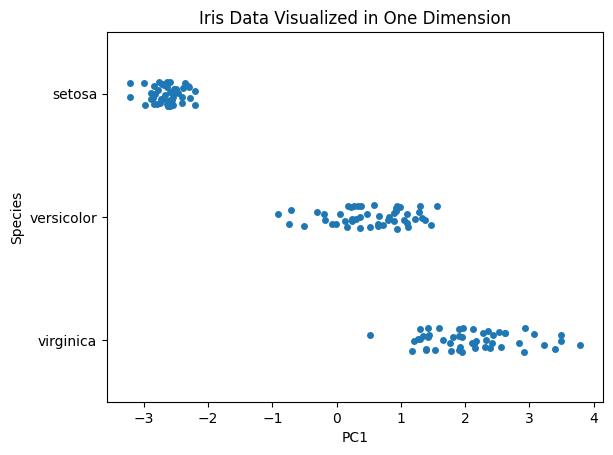

2 Principal Components are required to explain 0.95 of the variation in this data.


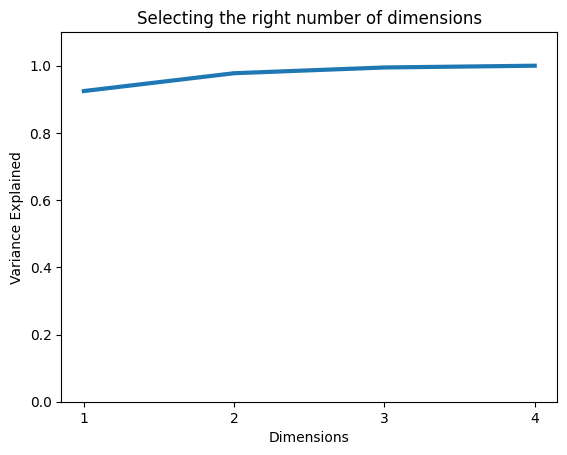

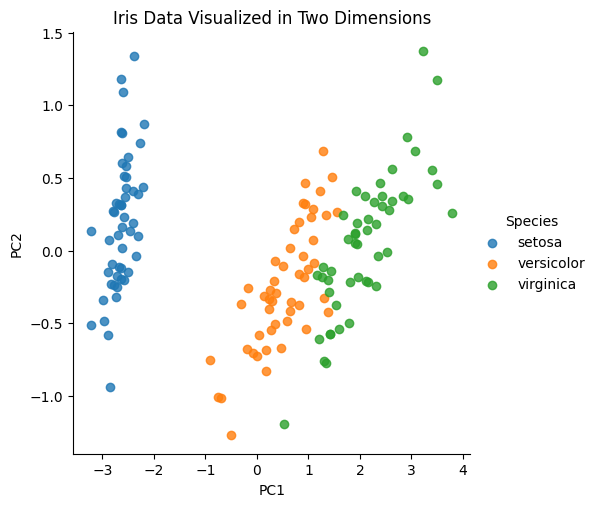

In [10]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['Label'] = y
df['Species'] = df['Label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

pca = PCA()
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df = pd.merge(df, pca_df, right_index=True, left_index=True)

print('Explained Variance Ratio')
for i in range(4):
    print('PC{}: {}'.format(i + 1, pca.explained_variance_ratio_[i]))

sns.stripplot(x="PC1", y="Species", data=df, jitter=True)
plt.title('Iris Data Visualized in One Dimension')
plt.show()

precent_of_variance_explained = 0.95
pca = PCA(n_components=precent_of_variance_explained)
pca_data = pca.fit_transform(X)
print("{} Principal Components are required to explain {} of the variation in this data.".format(pca.n_components_, precent_of_variance_explained))

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.arange(len(cumsum)) + 1
plt.plot(dim, cumsum, '-', lw=3)
plt.xlabel('Dimensions')
plt.ylabel('Variance Explained')
plt.title('Selecting the right number of dimensions')
plt.xticks([1, 2, 3, 4])
plt.ylim([0, 1.1])
plt.show()

sns.lmplot(x='PC1', y='PC2', data=df, hue='Species', fit_reg=False)
plt.title('Iris Data Visualized in Two Dimensions')
plt.show()


In [ ]:
EXPERIMENT 5

In [12]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([
    ('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'),
    ('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),
    ('E', 'F'), ('E', 'D'), ('E', 'H'), ('I', 'J')
])

# Calculate clustering value for each node in the graph
clustering_values = nx.clustering(G)

# Print the clustering value for each node on new lines
for node, clustering_value in clustering_values.items():
    print(f"Clustering value for node '{node}': {clustering_value}")

# Calculate clustering value for a specific node (e.g., 'C')
clustering_value_C = nx.clustering(G, 'C')

# Print the clustering value for the specified node
print(f"\nClustering value for node 'C': {clustering_value_C}")


Clustering value for node 'A': 0.6666666666666666
Clustering value for node 'B': 0.6666666666666666
Clustering value for node 'K': 1.0
Clustering value for node 'C': 0.3333333333333333
Clustering value for node 'F': 0.3333333333333333
Clustering value for node 'G': 0
Clustering value for node 'E': 0.16666666666666666
Clustering value for node 'D': 0
Clustering value for node 'H': 0
Clustering value for node 'I': 0
Clustering value for node 'J': 0

Clustering value for node 'C': 0.3333333333333333


Is the graph connected? False
Number of connected components: 2
Nodes in connected components:
{'H', 'G', 'B', 'C', 'A', 'E', 'F', 'K', 'D'}
{'I', 'J'}
Nodes in the connected component of node 'I': ['I', 'J']
Node connectivity: 0
Edge connectivity: 0


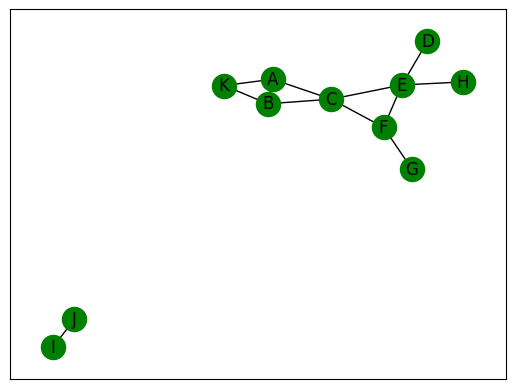

In [13]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'),
 ('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),
 ('E', 'F'), ('E', 'D'), ('E', 'H'), ('I', 'J')])

# Visualize the graph
nx.draw_networkx(G, with_labels=True, node_color='green')

# Check if the graph is connected (True or False)
print("Is the graph connected?", nx.is_connected(G))

# Calculate the number of different connected components
print("Number of connected components:", nx.number_connected_components(G))

# List nodes in different connected components
print("Nodes in connected components:")
connected_components = list(nx.connected_components(G))
for component in connected_components:
    print(component)

# List nodes of the component containing the given node ('I')
print("Nodes in the connected component of node 'I':", list(nx.node_connected_component(G, 'I')))

# Calculate the number of nodes to be removed so that the graph becomes disconnected
print("Node connectivity:", nx.node_connectivity(G))

# Calculate the number of edges to be removed so that the graph becomes disconnected
print("Edge connectivity:", nx.edge_connectivity(G))


In [ ]:
EXPERIMENT 6

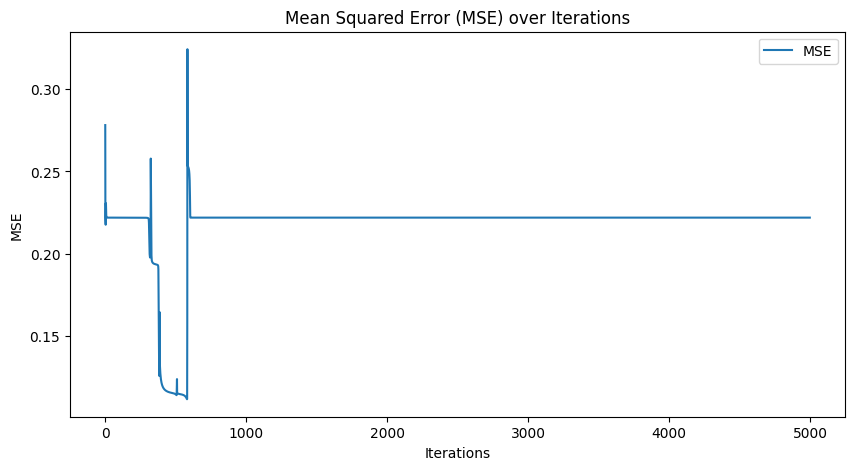

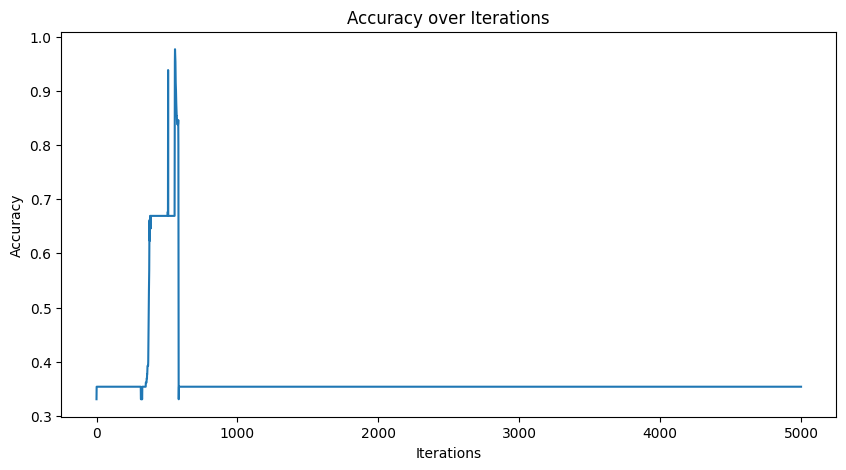

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y = data.target
y = pd.get_dummies(y).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

learning_rate = 0.1
iterations = 5000
N = y_train.shape[0]
input_size = 4
hidden_size = 2
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])
np.random.seed(10)

W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mean_squared_error(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def accuracy(y_pred, y_true):
    correct = (np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1)).sum()
    return correct / len(y_pred)

mse_values = []

for itr in range(iterations):
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    mse = mean_squared_error(A2, y_train)
    mse_values.append(mse)  # Store the MSE values

    acc = accuracy(A2, y_train)
    results = pd.concat([results, pd.DataFrame({"mse": [mse], "accuracy": [acc]})], ignore_index=True)

    E2 = y_train - A2
    dW2 = E2 * sigmoid_derivative(A2)

    E1 = dW2.dot(W2.T)
    dW1 = E1 * sigmoid_derivative(A1)

    W2 += A1.T.dot(dW2) * learning_rate
    W1 += X_train.T.dot(dW1) * learning_rate

# Plot the MSE values
plt.figure(figsize=(10, 5))
plt.plot(range(iterations), mse_values, label="MSE")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Mean Squared Error (MSE) over Iterations")
plt.legend()
plt.show()

# Plot the accuracy values
plt.figure(figsize=(10, 5))
results.accuracy.plot(title="Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy over Iterations")
plt.show()
